# How to use the “genome search” for MGnify MAGs

## Note:

Notebook tested with a docker container based on the following Dockerfile (works for M1):
```
FROM python:3.10.8

RUN apt update -y
RUN apt install wget -y

WORKDIR /usr/src

COPY requirements.txt .

RUN apt install openjdk-11-jdk -y
RUN pip install --upgrade pip
RUN pip install -r requirements.txt

RUN mkdir -p /usr/src/data
VOLUME /usr/src/dat`
```

with the following requirements.txt file:

```
jsonapi-client==0.9.9
pyspark==3.3.1
pandas==1.5.1
pyarrow==10.0.0
numpy==1.23.4
scipy==1.9.3
matplotlib==3.6.2
seaborn==0.12.1
plotly==5.11.0
jupyterlab==3.5.0
sourmash==4.5.0
biopython==1.79

```

## Import libraries

In [1]:
# Connection to MGnify API
from jsonapi_client import Session as APISession
from jsonapi_client import Modifier
import requests

# Dataframes and display
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline 

# Warning verbosity
import warnings 
warnings.filterwarnings(action="ignore")

## Query the `genomes` database from MGnify API

For the genome dataset, use `genomes` endpoint.   
A complete list of endpoints can be found at https://www.ebi.ac.uk/metagenomics/api/v1/.

In [2]:
endpoint_name = 'genomes'

The function `Modifier` from the `jsonapi_client` module allow to query for specific values in given fields (e.g.: 'geographic-origin', 'taxon-lineage').    
A way to explore the available field is to use `requests`.

In [3]:
r = requests.get(f"https://www.ebi.ac.uk/metagenomics/api/v1/{endpoint_name}")

In [4]:
r.json()['data'][0]

{'type': 'genomes',
 'id': 'MGYG000299273',
 'attributes': {'genome-id': 13741,
  'geographic-origin': 'Asia',
  'geographic-range': ['North America', 'Europe', 'Asia'],
  'accession': 'MGYG000299273',
  'ena-genome-accession': None,
  'ena-sample-accession': 'ERS7599803',
  'ena-study-accession': 'ERP108069',
  'ncbi-genome-accession': None,
  'ncbi-sample-accession': None,
  'ncbi-study-accession': None,
  'img-genome-accession': None,
  'patric-genome-accession': None,
  'length': 1611607,
  'num-contigs': 63,
  'n-50': 37820,
  'gc-content': 45.53,
  'type': 'MAG',
  'completeness': 100.0,
  'contamination': 0.3,
  'rna-5s': 92.44,
  'rna-16s': 0.0,
  'rna-23s': 5.98,
  'trnas': 18.0,
  'nc-rnas': 30,
  'num-proteins': 1533,
  'eggnog-coverage': 97.06,
  'ipr-coverage': 91.52,
  'taxon-lineage': 'd__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__Anaeroglobus;s__Anaeroglobus micronuciformis',
  'num-genomes-total': 21,
  'pangenome-size': 1854,
  '

### Get information for a specic genus or species

Examples:   
Search for available ressources for a specific genus or species of interest.  
- *Listeria*
- *Listeria monocytogenes*


The `taxon-lineage` field contains domain, phylum, class, order, family, genus, species, subspecies as `d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes`(example for *Listeria monocytogenes*).   
The filter can use the full lineage `d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria` or only part of it `g__Listeria` or `Listeria`.

#### Set the desired filter(s)

In [5]:
genus_filter = 'Listeria'
species_filter = 'Listeria monocytogenes'

#### Query the database with the 'Listeria' filter and store the results in a Pandas DataFrame.

In [6]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter = Modifier(f"taxon_lineage={genus_filter}")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=search_filter))
    resources_df = pd.json_normalize(resources)

In [7]:
# Display the table containing the results of the query
resources_df

,type,id,attributes.genome-id,attributes.geographic-range,attributes.geographic-origin,attributes.accession,attributes.ncbi-sample-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type
0,genomes,MGYG000002392,6517,[NA],not provided,MGYG000002392,SAMN09947982,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2975.0,2760.0,215.0,2021-12-07T19:05:27.619229,2021-12-07T19:05:27.616284,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
1,genomes,MGYG000002325,6025,"[North America, Europe, NA]",North America,MGYG000002325,SAMN07124731,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.00,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,3286.0,2650.0,636.0,2021-12-07T18:49:57.209400,2021-12-07T18:49:57.206690,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
2,genomes,MGYG000001395,5358,[],not provided,MGYG000001395,SAMN02299452,PRJNA224116,2890785,45,227246,37.35,Isolate,99.45,0.55,94.96,93.93,99.83,18.0,86,2880,97.15,91.77,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria innocua,1,NaN,NaN,NaN,2021-12-07T18:25:36.389648,2021-12-07T18:25:36.386977,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
3,genomes,MGYG000001298,8569,[Europe],Europe,MGYG000001298,SAMN00001446,PRJNA224116,2589961,6,982217,41.60,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,64,2561,95.28,91.88,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria grayi,2,2552.0,2552.0,0.0,2021-12-07T20:02:11.108760,2021-12-07T20:02:11.105691,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues


Four entries are obtained for *Listeria* genus. 

#### Query the database with the 'Listeria monocytogenes' filter and store the results in a Pandas DataFrame.

In [8]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    search_filter_2 = Modifier(f"taxon_lineage={species_filter}")
    resources_2 = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=search_filter_2))
    resources_df_2 = pd.json_normalize(resources_2)

In [9]:
# Display the table containing the results of the query
resources_df_2

,type,id,attributes.genome-id,attributes.geographic-range,attributes.geographic-origin,attributes.accession,attributes.ncbi-sample-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type
0,genomes,MGYG000002392,6517,[NA],not provided,MGYG000002392,SAMN09947982,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.0,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2975,2760,215,2021-12-07T19:05:27.619229,2021-12-07T19:05:27.616284,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
1,genomes,MGYG000002325,6025,"[North America, Europe, NA]",North America,MGYG000002325,SAMN07124731,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.0,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,3286,2650,636,2021-12-07T18:49:57.209400,2021-12-07T18:49:57.206690,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues


Four entries are obtained for *Listeria monocytogenes* species. 

### Save the results as parquet.

Pandas allow you to save your query results under multiple format. (see Pandas documentation for more options: https://pandas.pydata.org/docs/reference/frame.html).

`parquet` files can be open with different libraries including (pandas, pyspark, polar...) and among other has the advantages to be a compressed format and to preserve the column types.

In [10]:
#resources_df.to_parquet('outputs/Listeria_ressources')

### Load previously saved parquet files

In [11]:
df = pd.read_parquet('outputs/Listeria_ressources')

In [12]:
df

,type,id,attributes.genome-id,attributes.geographic-range,attributes.geographic-origin,attributes.accession,attributes.ncbi-sample-accession,attributes.ncbi-study-accession,attributes.length,attributes.num-contigs,attributes.n-50,attributes.gc-content,attributes.type,attributes.completeness,attributes.contamination,attributes.rna-5s,attributes.rna-16s,attributes.rna-23s,attributes.trnas,attributes.nc-rnas,attributes.num-proteins,attributes.eggnog-coverage,attributes.ipr-coverage,attributes.taxon-lineage,attributes.num-genomes-total,attributes.pangenome-size,attributes.pangenome-core-size,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.biome.data.id,relationships.biome.data.type,relationships.catalogue.data.id,relationships.catalogue.data.type
0,genomes,MGYG000002392,6517,[NA],not provided,MGYG000002392,SAMN09947982,PRJNA486730,2941624,14,443696,37.79,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,105,2895,98.20,92.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes,2,2975.0,2760.0,215.0,2021-12-07T19:05:27.619229,2021-12-07T19:05:27.616284,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
1,genomes,MGYG000002325,6025,"[North America, Europe, NA]",North America,MGYG000002325,SAMN07124731,PRJNA167876,3017944,1,3017944,37.96,Isolate,99.45,0.00,94.96,99.67,99.79,20.0,108,2967,97.84,92.25,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria monocytogenes_B,7,3286.0,2650.0,636.0,2021-12-07T18:49:57.209400,2021-12-07T18:49:57.206690,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
2,genomes,MGYG000001395,5358,[],not provided,MGYG000001395,SAMN02299452,PRJNA224116,2890785,45,227246,37.35,Isolate,99.45,0.55,94.96,93.93,99.83,18.0,86,2880,97.15,91.77,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria innocua,1,NaN,NaN,NaN,2021-12-07T18:25:36.389648,2021-12-07T18:25:36.386977,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues
3,genomes,MGYG000001298,8569,[Europe],Europe,MGYG000001298,SAMN00001446,PRJNA224116,2589961,6,982217,41.60,Isolate,99.45,0.00,94.96,99.67,99.83,20.0,64,2561,95.28,91.88,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria grayi,2,2552.0,2552.0,0.0,2021-12-07T20:02:11.108760,2021-12-07T20:02:11.105691,root:Host-associated:Human:Digestive system:Large intestine,biomes,human-gut-v2-0,genome-catalogues


## Explore the `genomes` dataset.

### Query and save the dataset as parquet file

In [13]:
#with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
#    resources_all = map(lambda r: r.json, mgnify.iterate(endpoint_name))

In [14]:
#resources_all_df = pd.json_normalize(resources_all)

In [15]:
#resources_all_df

In [16]:
#resources_all_df.to_parquet('outputs/all_genome_ressources')

### Load the dataset file with another library

In [17]:
from pyspark.sql import SparkSession

import pyspark.sql.functions as F

In [18]:
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/09 12:44:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [19]:
spark

In [20]:
all_df = spark.read.parquet('./outputs/all_genome_ressources')

Get the number of rows

In [21]:
all_df.count()

9421

### Get stats when applicable

For example, the first record gives the number of non-null values for each column.

In [22]:
all_df.describe().show(truncate=False, vertical=True)

22/11/09 12:44:32 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------
 summary                             | count                                                                                                                    
 type                                | 9421                                                                                                                     
 id                                  | 9421                                                                                                                     
 attributes.genome-id                | 9421                                                                                                                     
 attributes.geo

### Get the most represented genus in the dataset

In [23]:
all_df.select(f'`attributes.taxon-lineage`').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------+
|attributes.taxon-lineage                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------+
|d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Megasphaeraceae;g__Anaeroglobus;s__Anaeroglobus micronuciformis    |
|d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella loescheii                  |
|d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus pneumoniae_D           |
|d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__UMGS1907;s__                         |
|d__Bacteria;p__Firmicutes_C;c__Negativicutes;o_

Give a sample of `taxon-lineage` present in the dataset. 

In [24]:
all_df.select('`id`').distinct().count()

9421

In [25]:
all_df.select('`attributes.taxon-lineage`').distinct().count()

7352

9421 entries/ids and 7352 unique taxons.

#### Split the taxon-lineage column into 7 columns

In [26]:
all_df1 = (all_df
           .withColumn('lineage_split', F.split(F.col('`attributes.taxon-lineage`'), ';'))
           .withColumn('domain', F.col('lineage_split')[0])
           .withColumn('phylum', F.col('lineage_split')[1])
           .withColumn('class', F.col('lineage_split')[2])
           .withColumn('order', F.col('lineage_split')[3])
           .withColumn('family', F.col('lineage_split')[4])
           .withColumn('genus', F.col('lineage_split')[5])
           .withColumn('species', F.col('lineage_split')[6])
           .withColumn('subspecies', F.col('lineage_split')[7])
          )

#### Query examples on taxon-lineage column:
To search the most represented species (Here return Collinsell genus with no species annotated)

In [27]:
all_df1.groupby('`attributes.taxon-lineage`').count().filter(F.col('count')>100).show(truncate=False)

+-------------------------------------------------------------------------------------------------------------+-----+
|attributes.taxon-lineage                                                                                     |count|
+-------------------------------------------------------------------------------------------------------------+-----+
|d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__|226  |
+-------------------------------------------------------------------------------------------------------------+-----+



To search for a particular lineage:

In [28]:
all_df1.filter(F.col('`attributes.taxon-lineage`').startswith('d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella')).count()

584

To search for a particular genus:

In [29]:
all_df1.filter(F.col('`attributes.taxon-lineage`').contains('Collinsella')).count()

584

#### Query examples on newly created columns:
To search for the most or least represented genus for example:

In [30]:
all_df1.groupby('genus').count().filter(F.col('count')>100).show()

+--------------+-----+
|         genus|count|
+--------------+-----+
| g__Prevotella|  351|
|        g__RC9|  152|
|           g__|  325|
|g__Collinsella|  584|
+--------------+-----+



In [31]:
all_df1.filter(F.col('genus')=='g__Collinsella').select('domain', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies').distinct().show(truncate=False)

+-----------+-------------------+-----------------+-------------------+--------------------+--------------+----------------------------+----------+
|domain     |phylum             |class            |order              |family              |genus         |species                     |subspecies|
+-----------+-------------------+-----------------+-------------------+--------------------+--------------+----------------------------+----------+
|d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp900556445  |null      |
|d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp900544135  |null      |
|d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp900755685  |null      |
|d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Co

In [32]:
all_df1.filter(F.col('genus')=='g__Collinsella').select('domain', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies').distinct().count()

277

In [33]:
all_df1.filter(F.col('genus')=='g__Collinsella').select('species').distinct().show(truncate=False)

+----------------------------+
|species                     |
+----------------------------+
|s__Collinsella sp900547765  |
|s__Collinsella sp900548935  |
|s__Collinsella aerofaciens_N|
|s__Collinsella sp900754445  |
|s__Collinsella sp900549455  |
|s__Collinsella sp900549715  |
|s__Collinsella sp900541195  |
|s__Collinsella sp003466125  |
|s__Collinsella sp900555765  |
|s__Collinsella sp900547505  |
|s__Collinsella sp900544995  |
|s__Collinsella sp900551555  |
|s__Collinsella sp900556495  |
|s__Collinsella sp900556415  |
|s__Collinsella sp003438495  |
|s__Collinsella sp900554255  |
|s__Collinsella sp900548565  |
|s__Collinsella sp900545615  |
|s__Collinsella sp900553415  |
|s__Collinsella sp900545165  |
+----------------------------+
only showing top 20 rows



## Graphical representation

In [34]:
#! pip install plotly
#! pip install ipywidgets

In [35]:
all_df1.count()

9421

#### Representation of the bacterial taxon-lineage

Gives an idea of the representation (proportional) of each taxon in the dataset.

In [36]:
#test_df.shape

In [37]:
#test_df = all_df1.toPandas()

In [38]:
#test_df.to_parquet('outputs/all_genome_lineage_cols')

List of the features used for the graphical representation:

In [39]:
features = all_df1.columns[-8:]

In [40]:
features 

['domain',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'subspecies']

In [41]:
all_df1.select([F.count_distinct(x) for x in ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies']]).show()

+----------------------+----------------------+---------------------+---------------------+----------------------+---------------------+-----------------------+--------------------------+
|count(DISTINCT domain)|count(DISTINCT phylum)|count(DISTINCT class)|count(DISTINCT order)|count(DISTINCT family)|count(DISTINCT genus)|count(DISTINCT species)|count(DISTINCT subspecies)|
+----------------------+----------------------+---------------------+---------------------+----------------------+---------------------+-----------------------+--------------------------+
|                     2|                    56|                  107|                  293|                   585|                 1991|                   6263|                         0|
+----------------------+----------------------+---------------------+---------------------+----------------------+---------------------+-----------------------+--------------------------+



Function used for graphic representation:

In [42]:
def get_Sankey(df,cat_cols=[],value_cols='', title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['rgba(31, 119, 180, 0.8)',
     'rgba(255, 127, 14, 0.8)',
     'rgba(44, 160, 44, 0.8)',
     'rgba(214, 39, 40, 0.8)',
     'rgba(148, 103, 189, 0.8)',
     'rgba(140, 86, 75, 0.8)',
     'rgba(227, 119, 194, 0.8)',
     'rgba(127, 127, 127, 0.8)']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
 
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
 
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum

    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
 
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
 
    # creating data for the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(
                color = "black",
                width = 0.5
            ),
            label = labelList,
            color = colorList
        ),
        link = dict(
            source = sourceTargetDf['sourceID'],
            target = sourceTargetDf['targetID'],
            value = sourceTargetDf['count']
        )
    )
    
    # override gray link colors with 'source' colors
    opacity = 0.4
    # change 'magenta' to its 'rgba' value to add opacity
    data['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['node']['color']]
    data['link']['color'] = [data['node']['color'][src].replace("0.8", str(opacity))
                                        for src in data['link']['source']]
    
    
    fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['node']['label'],
      color =  data['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['link']['source'],
      target =  data['link']['target'],
      value =  data['link']['value'],
      color =  data['link']['color']
    ))])
    
    fig.update_layout(title_text=title, font_size=10)
    
    return fig.show(renderer='iframe')

Taxon-lineage represented in Genomes dataset

In [43]:
pdf = all_df1.select(features).groupby(features).count().toPandas()

In [44]:
fig = get_Sankey(pdf,cat_cols=features[0:4], value_cols='count', title='Taxon-lineage represented in Genomes dataset')

#### Representation of a sample of the genomes present in the dataset: Example of the order of the Lactobacillales.

In [45]:
pdf_lactobacillales = all_df1.filter(F.col('order')=='o__Lactobacillales').select(features).groupby(features).count().toPandas()

In [46]:
fig_l = get_Sankey(pdf_lactobacillales,cat_cols=features[0:6], value_cols='count',title='Genomes from the Lactobacillales order')

In [47]:
all_df1.filter(F.col('order')=='o__Lactobacillales').select('species').distinct().count()

164

### Information such as genome length or GC-content can also be represented

Representation can be made by family, genus, species... depending on the number of sequence available and on the biological significance.

In [48]:
lactobacillales_df = all_df1.filter(F.col('order')=='o__Lactobacillales').orderBy('family').toPandas()
lactobacillales_count = all_df1.filter(F.col('order')=='o__Lactobacillales').groupby('family').count().orderBy('family').toPandas()

In [49]:
lactobacillales_count

,family,count
0,f__Aerococcaceae,12
1,f__Enterococcaceae,20
2,f__Lactobacillaceae,86
3,f__Listeriaceae,4
4,f__Streptococcaceae,100
5,f__Vagococcaceae,2


Text(0.5, 0.98, 'Number of genomes avalaible, genome length and GC-content of bacteria belonging the Lactobacillales order')

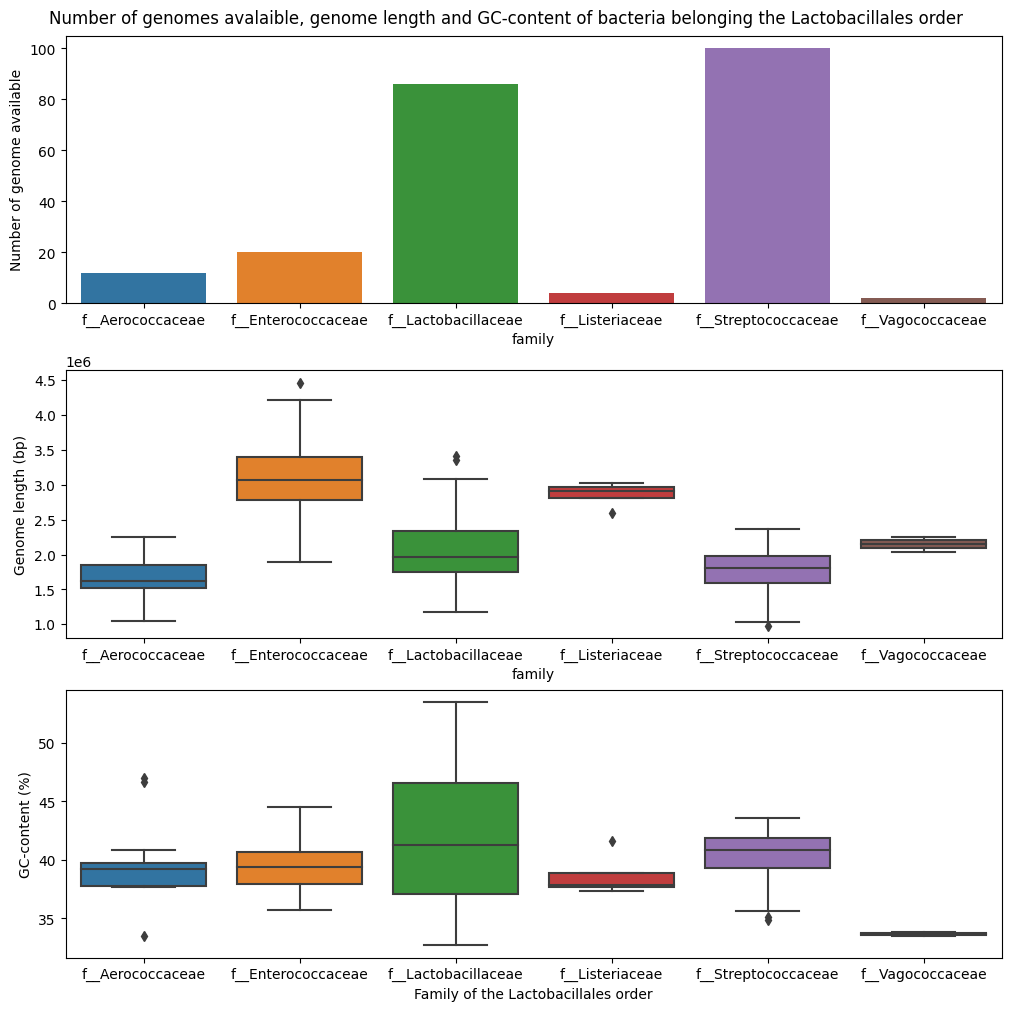

In [50]:
fig = plt.figure(figsize=(10, 10), layout="constrained")
spec = fig.add_gridspec(3, 1)

ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data=lactobacillales_count, x='family', y='count')
plt.ylabel("Number of genome available")

ax10 = fig.add_subplot(spec[1, 0])
sns.boxplot(data=lactobacillales_df, x='family', y='attributes.length')
plt.ylabel("Genome length (bp)")
#plt.xlabel("Family of the Lactobacillales order")

ax20 = fig.add_subplot(spec[2, 0])
sns.boxplot(data=lactobacillales_df, x='family', y='attributes.gc-content')
plt.ylabel("GC-content (%)")
plt.xlabel("Family of the Lactobacillales order")


fig.suptitle('Number of genomes avalaible, genome length and GC-content of bacteria belonging the Lactobacillales order')
#plt.savefig("outputs/lactobacillales_1.png",transparent=True)

Text(0.5, 0.98, 'Biome and Catalogue related to bacteria belonging the Lactobacillales order')

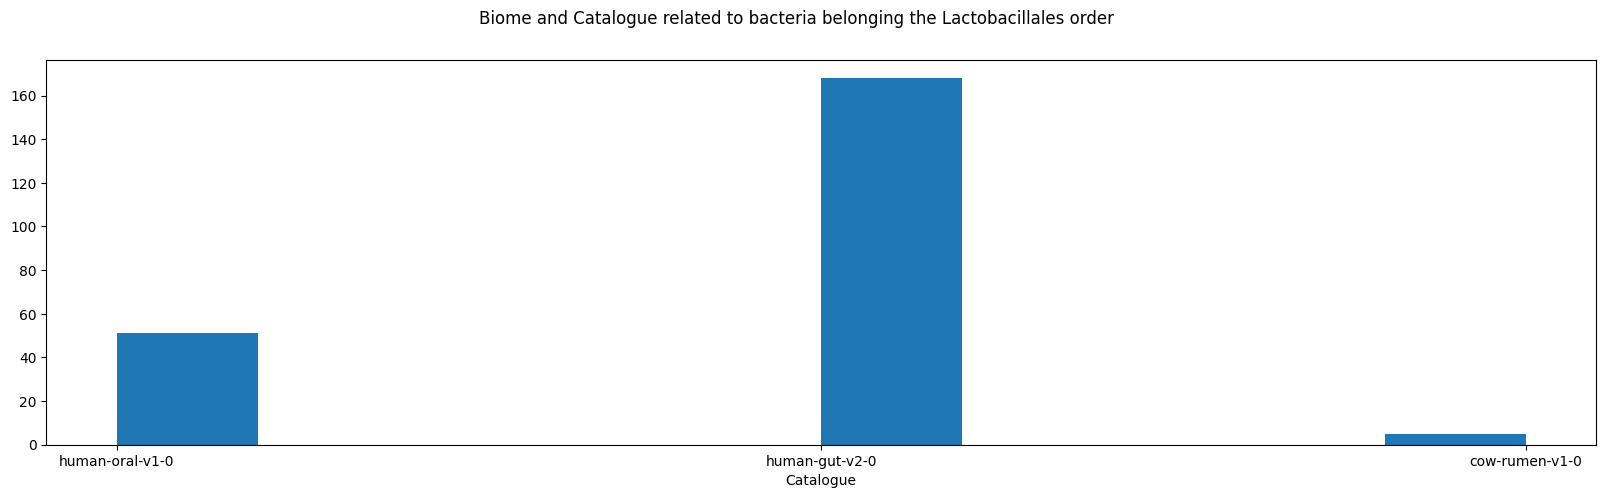

In [51]:
fig = plt.figure(figsize=(20, 5))
spec = fig.add_gridspec(1, 2)

#ax00 = fig.add_subplot(spec[0, 0])
#lactobacillales_df['relationships.biome.data.id'].hist()
#plt.xlabel("Biome")

ax01 = fig.add_subplot(spec[0:])
lactobacillales_df['relationships.catalogue.data.id'].hist()
plt.xlabel("Catalogue")
ax01.grid(False)

fig.suptitle('Biome and Catalogue related to bacteria belonging the Lactobacillales order')
#plt.savefig("outputs/lactobacillales_2.png",transparent=True)

## Find out whether your own MAGs are novel compared to the MGnify catalogues

Query your own MAG against MGnify's MAG catalogues, to see whether they are novel or already represented

In [52]:
import sourmash
import glob
from pathlib import PurePath as pp
from Bio import SeqIO

### List directories of the files to be analysed:
Replace the str with your own path to folder containing your files. `*` allows to query all the file with the `.fa` extension.

In [53]:
files = glob.glob('inputs/*.fa')

In [54]:
files

['inputs/bin.1.fa',
 'inputs/bin.3.fa',
 'inputs/bin.5.fa',
 'inputs/bin.4.fa',
 'inputs/bin.2.fa']

### Compute a sourmash sketch for each MAG

Create "sketches" for each MAG using Sourmash
(https://sourmash.readthedocs.io/en/latest/index.html#sourmash-in-brief)

A sketch goes into a signature, that we will use for searching. The signature is a sort of collection of hashes that are well suited for calculating the containment of your MAGs within the catalogue's MAGs.

In [55]:
for mag in files:
    # The sourmash parameters are chosen to match those used within MGnify
    sketch = sourmash.MinHash(n=0, ksize=31, scaled=1000)
    
    # A fasta file may have multiple records in it. Add them all to the sourmash signature.
    for index, record in enumerate(SeqIO.parse(mag, 'fasta')):
        sketch.add_sequence(str(record.seq))
        
    # Save the sourmash sketch as a "signature" file
    signature = sourmash.SourmashSignature(sketch, name=record.name)
    with open('outputs/signatures/'+ pp(pp(mag).name).stem + '.sig', 'wt') as fp:
        sourmash.save_signatures([signature], fp)

### Fetch all of the catalogue IDs currently available on MGnify

To fetch the `catalogue IDs` to the MGnify API, use the following endpoint: `https://www.ebi.ac.uk/metagenomics/api/v1/genome-catalogues`.  

In [56]:
catalogue_endpoint = "genome-catalogues"

In [57]:
with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    catalogues = map(lambda r: r.json, mgnify.iterate(catalogue_endpoint))
    catalogues = pd.json_normalize(catalogues)

In [58]:
catalogue_ids = list(catalogues['id'])
catalogue_ids

['cow-rumen-v1-0', 'human-gut-v2-0', 'human-oral-v1-0', 'marine-v1-0']

### Submit a search job to the MGnify API

To`submit a job` to the MGnify API, use the following endpoint: `https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/gather`.  
Data will be send to the API, which is called "POST"ing data in the API world.  
This part of the API is quite specialized and so is not a formal JSON:API, the `requests` Python packageìs therefore used to communicate with it.

In [59]:
endpoint = 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/gather'

In [60]:
# Create a list of file uploads, and attach them to the API request
signatures = [open(sig, 'rb') for sig in glob.glob('outputs/signatures/*.sig')]
sketch_uploads = [('file_uploaded', signature) for signature in signatures]

# Send the API request - it specifies which catalogue to search against and attaches all of the signature files.
submitted_job = requests.post(endpoint, data={'mag_catalogues': catalogue_ids}, files=sketch_uploads).json()


map(lambda fp: fp.close(), signatures)  # tidy up open file pointers

print(submitted_job)

{'data': {'message': 'Your files bin.4.sig,bin.1.sig,bin.5.sig,bin.3.sig,bin.2.sig were successfully uploaded. Use the given URL to check the status of the new job', 'job_id': 'd5a87b80-1131-41c7-ad53-78c440d5475c', 'children_ids': None, 'signatures_received': ['bin.4.sig', 'bin.1.sig', 'bin.5.sig', 'bin.3.sig', 'bin.2.sig'], 'status_URL': 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/status/d5a87b80-1131-41c7-ad53-78c440d5475c'}}


### Wait for the results to be ready

As you can see in the `printed submitted_job` above, a status_URL was returned in the response from submitting the job via the API. Since the job is in a queue, this status_URL must be polled to wait for our job to be completed.  
Below is an example to check every 2 seconds until ALL of the jobs are finished. The time can be easily change (to 10s in the example below) by setting a different sleeping value:
```python
time.sleep(10)
```

In [62]:
job_done = False
while not job_done:
    print('Checking status...')
    # The status_URL is another API endpoint that's unique for the submitted search job
    query_result = requests.get(submitted_job['data']['status_URL'])
    
    queries_status = {sig['job_id']: sig['status'] for sig in query_result.json()['data']['signatures']}
    job_done = all(map(lambda q: q == 'SUCCESS', queries_status.values()))
    if not job_done:
        print('Still waiting for jobs to complete. Current status of jobs')
        print(queries_status)
        print('Will check again in 2 seconds')
        time.sleep(2)

print('All finished!')

Checking status...
All finished!


The `query_result` contains the results of the query.   
The results can be visualised as json:

In [63]:
query_result.json()

{'data': {'group_id': 'd5a87b80-1131-41c7-ad53-78c440d5475c',
  'signatures': [{'job_id': '8acede77-39c1-409c-8360-a548fa3c5eef',
    'status': 'SUCCESS',
    'filename': 'bin.4.sig',
    'result': {'status': 'NO_RESULTS',
     'catalog': 'cow-rumen-v1-0',
     'query_filename': 'bin.4.sig',
     'md5_name': '95935c5aa1283dd063a19eff883ea84c.sig'},
    'results_url': 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/8acede77-39c1-409c-8360-a548fa3c5eef',
    'catalogue': 'cow-rumen-v1-0'},
   {'job_id': 'f6f29740-7aba-4dec-87cf-8bdc441c41df',
    'status': 'SUCCESS',
    'filename': 'bin.4.sig',
    'result': {'overlap': '0.9 Mbp',
     'p_query': '66.8%',
     'p_match': '45.4%',
     'match': 'MGYG000002570',
     'catalog': 'human-gut-v2-0',
     'query_filename': 'bin.4.sig',
     'md5_name': '95935c5aa1283dd063a19eff883ea84c.sig',
     'matches': 1},
    'results_url': 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/f6f29740-7aba-4dec-87cf-8bdc441

In [64]:
query_result_df = pd.json_normalize(query_result.json()['data']['signatures'])

In [65]:
query_result_df

,job_id,status,filename,results_url,catalogue,result.status,result.catalog,result.query_filename,result.md5_name,result.overlap,result.p_query,result.p_match,result.match,result.matches
0,8acede77-39c1-409c-8360-a548fa3c5eef,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/8acede77-39c1-409c-8360-a548fa3c5eef,cow-rumen-v1-0,NO_RESULTS,cow-rumen-v1-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,NaN,NaN,NaN,NaN,NaN
1,f6f29740-7aba-4dec-87cf-8bdc441c41df,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/f6f29740-7aba-4dec-87cf-8bdc441c41df,human-gut-v2-0,NaN,human-gut-v2-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,0.9 Mbp,66.8%,45.4%,MGYG000002570,1.0
2,19c801fb-67f7-425a-a92d-3579b555032e,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/19c801fb-67f7-425a-a92d-3579b555032e,marine-v1-0,NO_RESULTS,marine-v1-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,NaN,NaN,NaN,NaN,NaN
3,f9e81a63-ccd2-4a02-bdf5-f4dbf3042129,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/f9e81a63-ccd2-4a02-bdf5-f4dbf3042129,human-oral-v1-0,NO_RESULTS,human-oral-v1-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,NaN,NaN,NaN,NaN,NaN
4,c3447ed5-a51e-468e-bb36-7d2716280359,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/c3447ed5-a51e-468e-bb36-7d2716280359,cow-rumen-v1-0,NO_RESULTS,cow-rumen-v1-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,NaN,NaN,NaN,NaN,NaN
5,7171ae49-93bb-4931-8d5b-e167191ebd79,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/7171ae49-93bb-4931-8d5b-e167191ebd79,human-gut-v2-0,NaN,human-gut-v2-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,1.9 Mbp,58.9%,52.7%,MGYG000000217,3.0
6,47f5dab4-127e-4c5d-8ea6-fd7835b24fb2,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/47f5dab4-127e-4c5d-8ea6-fd7835b24fb2,marine-v1-0,NO_RESULTS,marine-v1-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,NaN,NaN,NaN,NaN,NaN
7,7649f290-461c-4388-b6d7-b06701ade4c6,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/7649f290-461c-4388-b6d7-b06701ade4c6,human-oral-v1-0,NO_RESULTS,human-oral-v1-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,NaN,NaN,NaN,NaN,NaN
8,d1415022-198c-4a78-9a02-2e03920512be,SUCCESS,bin.5.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/d1415022-198c-4a78-9a02-2e03920512be,cow-rumen-v1-0,NO_RESULTS,cow-rumen-v1-0,bin.5.sig,588a9cfc6aad0f88443f6afd115a738e.sig,NaN,NaN,NaN,NaN,NaN
9,b1b7db4e-8430-474f-97cb-9b848f8316cb,SUCCESS,bin.5.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/b1b7db4e-8430-474f-97cb-9b848f8316cb,human-gut-v2-0,NaN,human-gut-v2-0,bin.5.sig,588a9cfc6aad0f88443f6afd115a738e.sig,0.9 Mbp,49.9%,48.0%,MGYG000004533,1.0


Each signature is queried against each catalogue entry.
Results can then be analysed according to your research:
- study related to bacteria of the human gut,
- ...

#### Are any of our MAGs found in biomes other than the human gut?

In [66]:
matches = query_result_df.dropna(subset=['result.match'])

In [67]:
matches

,job_id,status,filename,results_url,catalogue,result.status,result.catalog,result.query_filename,result.md5_name,result.overlap,result.p_query,result.p_match,result.match,result.matches
1,f6f29740-7aba-4dec-87cf-8bdc441c41df,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/f6f29740-7aba-4dec-87cf-8bdc441c41df,human-gut-v2-0,NaN,human-gut-v2-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,0.9 Mbp,66.8%,45.4%,MGYG000002570,1.0
5,7171ae49-93bb-4931-8d5b-e167191ebd79,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/7171ae49-93bb-4931-8d5b-e167191ebd79,human-gut-v2-0,NaN,human-gut-v2-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,1.9 Mbp,58.9%,52.7%,MGYG000000217,3.0
9,b1b7db4e-8430-474f-97cb-9b848f8316cb,SUCCESS,bin.5.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/b1b7db4e-8430-474f-97cb-9b848f8316cb,human-gut-v2-0,NaN,human-gut-v2-0,bin.5.sig,588a9cfc6aad0f88443f6afd115a738e.sig,0.9 Mbp,49.9%,48.0%,MGYG000004533,1.0
12,3af5d913-f69b-4f96-b434-9a2d16f45656,SUCCESS,bin.3.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/3af5d913-f69b-4f96-b434-9a2d16f45656,cow-rumen-v1-0,NaN,cow-rumen-v1-0,bin.3.sig,c399bb823a0358c2951ad2ac951daef6.sig,0.8 Mbp,30.3%,31.3%,MGYG000292488,1.0
13,4233ba6f-567f-429c-ae03-51d8934f4b90,SUCCESS,bin.3.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/4233ba6f-567f-429c-ae03-51d8934f4b90,human-gut-v2-0,NaN,human-gut-v2-0,bin.3.sig,c399bb823a0358c2951ad2ac951daef6.sig,1.8 Mbp,66.8%,57.0%,MGYG000000060,2.0
17,774bbe98-44f2-4c52-a2fd-75f059e15e42,SUCCESS,bin.2.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/774bbe98-44f2-4c52-a2fd-75f059e15e42,human-gut-v2-0,NaN,human-gut-v2-0,bin.2.sig,a6546452612d9462460ebdbd94c6c611.sig,3.4 Mbp,22.2%,63.0%,MGYG000002478,19.0


Text(0.5, 0.98, 'MAGs match with biomes')

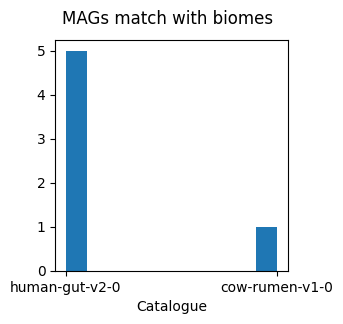

In [68]:
fig = plt.figure(figsize=(3, 3))
spec = fig.add_gridspec(1, 2)

ax01 = fig.add_subplot(spec[0:])
matches.catalogue.hist()
plt.xlabel("Catalogue")
ax01.grid(False)

fig.suptitle('MAGs match with biomes')
#plt.savefig("outputs/signature_matches.png",transparent=True)

#### What is the taxonomy of the MGnify MAGs which match the query?

Call the API for each Genome, to find it's taxonomic lineage.

In [69]:
def get_taxonomy_of_mgnify_mag(match_row):
    mgyg_accession = match_row['result.match']
    with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
        genome_document = mgnify.get('genomes', mgyg_accession)
        return genome_document.resource.taxon_lineage

Create a new column in the matches the table.

In [70]:
matches['best_match_taxonomy'] = matches.apply(get_taxonomy_of_mgnify_mag, axis=1)

In [71]:
matches

,job_id,status,filename,results_url,catalogue,result.status,result.catalog,result.query_filename,result.md5_name,result.overlap,result.p_query,result.p_match,result.match,result.matches,best_match_taxonomy
1,f6f29740-7aba-4dec-87cf-8bdc441c41df,SUCCESS,bin.4.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/f6f29740-7aba-4dec-87cf-8bdc441c41df,human-gut-v2-0,NaN,human-gut-v2-0,bin.4.sig,95935c5aa1283dd063a19eff883ea84c.sig,0.9 Mbp,66.8%,45.4%,MGYG000002570,1.0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Ruminococcus_E;s__Ruminococcus_E sp003526955
5,7171ae49-93bb-4931-8d5b-e167191ebd79,SUCCESS,bin.1.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/7171ae49-93bb-4931-8d5b-e167191ebd79,human-gut-v2-0,NaN,human-gut-v2-0,bin.1.sig,90de13310088a31d1ccb76f1da574cb6.sig,1.9 Mbp,58.9%,52.7%,MGYG000000217,3.0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Acetatifactor;s__Acetatifactor sp900066565
9,b1b7db4e-8430-474f-97cb-9b848f8316cb,SUCCESS,bin.5.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/b1b7db4e-8430-474f-97cb-9b848f8316cb,human-gut-v2-0,NaN,human-gut-v2-0,bin.5.sig,588a9cfc6aad0f88443f6afd115a738e.sig,0.9 Mbp,49.9%,48.0%,MGYG000004533,1.0,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__CAG-495;s__CAG-495 sp000436375
12,3af5d913-f69b-4f96-b434-9a2d16f45656,SUCCESS,bin.3.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/3af5d913-f69b-4f96-b434-9a2d16f45656,cow-rumen-v1-0,NaN,cow-rumen-v1-0,bin.3.sig,c399bb823a0358c2951ad2ac951daef6.sig,0.8 Mbp,30.3%,31.3%,MGYG000292488,1.0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospira;s__Lachnospira sp003537285
13,4233ba6f-567f-429c-ae03-51d8934f4b90,SUCCESS,bin.3.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/4233ba6f-567f-429c-ae03-51d8934f4b90,human-gut-v2-0,NaN,human-gut-v2-0,bin.3.sig,c399bb823a0358c2951ad2ac951daef6.sig,1.8 Mbp,66.8%,57.0%,MGYG000000060,2.0,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospira;s__Lachnospira eligens_A
17,774bbe98-44f2-4c52-a2fd-75f059e15e42,SUCCESS,bin.2.sig,https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/results/774bbe98-44f2-4c52-a2fd-75f059e15e42,human-gut-v2-0,NaN,human-gut-v2-0,bin.2.sig,a6546452612d9462460ebdbd94c6c611.sig,3.4 Mbp,22.2%,63.0%,MGYG000002478,19.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola dorei


Summarise results with more verbose:

In [72]:
for row, match in matches.iterrows():
    print(f"The MAG ({match['filename']}) matches {match['result.match']} which has taxonomy {match['best_match_taxonomy']}")

The MAG (bin.4.sig) matches MGYG000002570 which has taxonomy d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Ruminococcus_E;s__Ruminococcus_E sp003526955
The MAG (bin.1.sig) matches MGYG000000217 which has taxonomy d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Acetatifactor;s__Acetatifactor sp900066565
The MAG (bin.5.sig) matches MGYG000004533 which has taxonomy d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__CAG-495;s__CAG-495 sp000436375
The MAG (bin.3.sig) matches MGYG000292488 which has taxonomy d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospira;s__Lachnospira sp003537285
The MAG (bin.3.sig) matches MGYG000000060 which has taxonomy d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospira;s__Lachnospira eligens_A
The MAG (bin.2.sig) matches MGYG000002478 which has taxonomy d__Bacteria;p__Bacteroidota;c__B

#### Which of our MAGs are completely novel (i.e. in no MGnify catalogue)

One way to check this is to group all of the search results by filename (i.e. finding the queries for each MAG vs all catalogues) and checking whether the sum of all matches is 0...

In [73]:
query_result_df.groupby('filename').apply(lambda query: query['result.matches'].sum() == 0)

filename
bin.1.sig    False
bin.2.sig    False
bin.3.sig    False
bin.4.sig    False
bin.5.sig    False
dtype: bool